<a href="https://colab.research.google.com/github/lkkcpaul/BostonHousePrice/blob/main/BostonHousePriceRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and preprocess data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [2]:
train_file_url = "https://raw.githubusercontent.com/lkkcpaul/BostonHousePrice/main/train.csv"
dataset_df = pd.read_csv(train_file_url)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [3]:
dataset_df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dataset_df.select_dtypes(include=np.number).describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
dataset_df.select_dtypes(exclude=np.number).nunique().T

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

What to do with null objects? There are a few with many nulls.

Alley: NA in alley means no alley access, which contains information

FireplaceQu: NA means no fireplace, which is encoded in "Fireplaces"

PoolQC: NA means no pool. That only 7 houses have pools, we probably don't need to distinguish between the quality of the pools

Fence: NA means no fence

MiscFeature: 49 of them are Shed. So we probably just make a column of "Shed" and delete this one

In [7]:
# Find the numeric columns that have missing values
# Decide how to fill them
has_numeric_na = dataset_df.select_dtypes(include=np.number).isna().any()
has_numeric_na[has_numeric_na]

LotFrontage    True
MasVnrArea     True
GarageYrBlt    True
dtype: bool

In [8]:
# We will impute Lot Frontage with mean,
# MasVnrArea with 0
# And GarageYrBlt with majority (since missing values just mean there's no garage)

In [9]:
drop_col = ['Id','PoolArea', 'PoolQC']
fillna_dict = {'MasVnrArea':0, 
               'LotFrontage':dataset_df.LotFrontage.mean(),
               'GarageYrBlt':dataset_df.GarageYrBlt.mean()
             }

def preprocess(data):
  temp = data.drop(drop_col, axis=1)
  temp['Shed']=0
  temp['Shed'][temp['MiscFeature']=='Shed'] = 1
  temp.drop('MiscFeature',axis=1,inplace=True)
  temp.fillna(fillna_dict,inplace=True)
  return temp

In [10]:
df = preprocess(dataset_df)

<ipython-input-9-e924caf0fb0a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Shed'][temp['MiscFeature']=='Shed'] = 1


In [11]:
from sklearn.preprocessing import OneHotEncoder
X_w_cat = df.drop('SalePrice',axis=1)
X_w_cat['MSSubClass'] = X_w_cat['MSSubClass'].map(str)
y = df.SalePrice
OHE = OneHotEncoder(handle_unknown = 'ignore',sparse_output=False)
X = pd.DataFrame(OHE.fit_transform(X_w_cat))

In [12]:
X.shape

(1460, 7632)

Text(0, 0.5, 'Frequency')

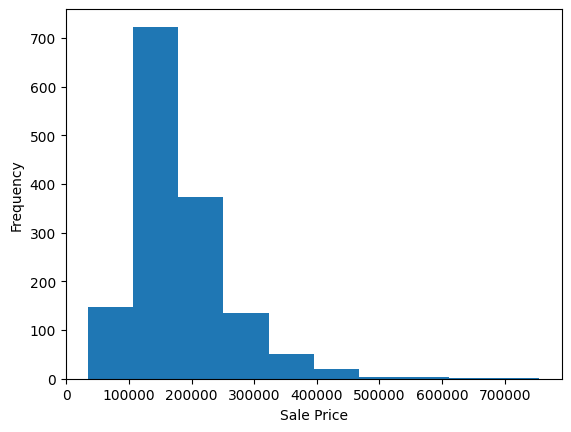

In [13]:
plt.hist(y)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# Linear Regression as benchmark

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_test_rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
print('The RMSE using linear regression is:', lr_test_rmse )

The RMSE using linear regression is: 31353.85868759527


# Random Forest

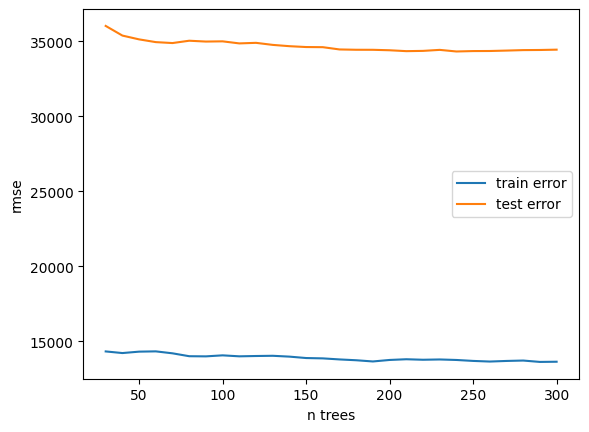

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

MIN_ESTIMATOR = 30
MAX_ESTIMATOR = 300

rf = RandomForestRegressor(
    warm_start=True,
    random_state=8)

train_error = []
test_error = []

for n_estimators in range(MIN_ESTIMATOR, MAX_ESTIMATOR+1, 10):
  rf.set_params(n_estimators=n_estimators)
  rf.fit(X_train,y_train)
  train_rmse = math.sqrt(mean_squared_error(y_train,rf.predict(X_train)))
  test_rmse = math.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
  
  train_error.append((n_estimators,train_rmse))
  test_error.append((n_estimators,test_rmse))
  
xs, ys = zip(*train_error)
plt.plot(xs,ys,label='train error')
xs, ys = zip(*test_error)
plt.plot(xs,ys,label='test error')
plt.xlabel('n trees')
plt.ylabel('rmse')
plt.legend()
plt.show()

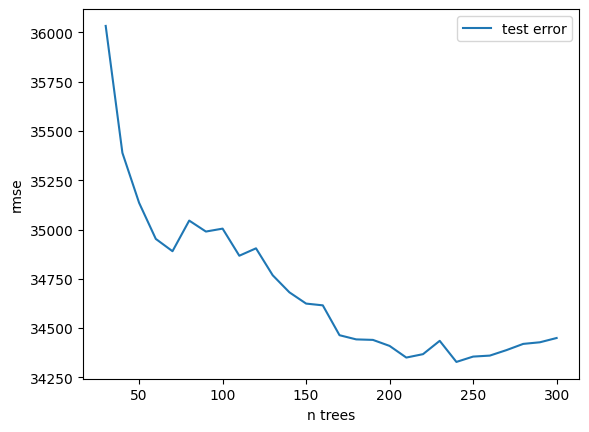

In [ ]:
xs, ys = zip(*test_error)
plt.plot(xs,ys,label='test error')
plt.xlabel('n trees')
plt.ylabel('rmse')
plt.legend()
plt.show()

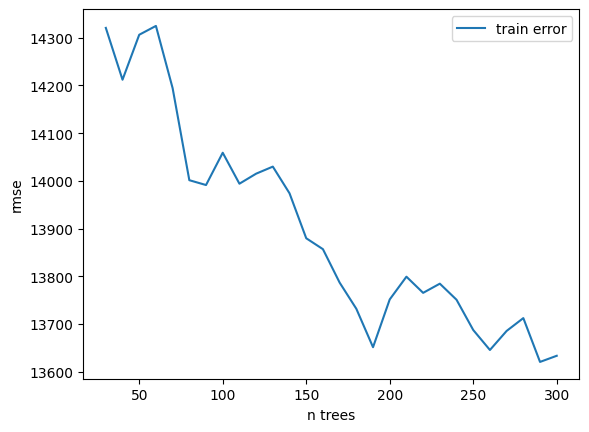

In [ ]:
xs, ys = zip(*train_error)
plt.plot(xs,ys,label='train error')
plt.xlabel('n trees')
plt.ylabel('rmse')
plt.legend()
plt.show()

# XGBoost

First try to drive the training loss to 0

In [15]:
from xgboost.sklearn import XGBRegressor

In [ ]:
%%time
xgb = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=15)
xgb.fit(X_train,y_train)
print('The train rmse is:',
      np.sqrt(mean_squared_error(y_train,xgb.predict(X_train)))
)
print('The test rmse is:',
      np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
)

The train rmse is: 931.5046109452572
The test rmse is: 35326.417209245716
CPU times: user 1min 52s, sys: 259 ms, total: 1min 52s
Wall time: 1min 7s


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
    'max_depth':range(4,16),
    #'gamma':[0.01,0.1,1,10],
    'learning_rate':[0.001,0.01,0.03,0.1],
    'n_estimators':[50,75,100,125,150]
}
n_trials = 10

xgb = XGBRegressor()
xgb_rscv = RandomizedSearchCV(xgb, 
                              xgb_params, 
                              n_iter = n_trials, 
                              scoring='neg_mean_squared_error',
                              verbose=3, cv=3)
xgb_rscv.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=-32938452339.709 total time=  23.8s
[CV 2/3] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=-32905350825.447 total time=  23.1s
[CV 3/3] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=-31430476980.259 total time=  22.7s
[CV 1/3] END learning_rate=0.01, max_depth=10, n_estimators=75;, score=-10222025678.241 total time=  29.6s
[CV 2/3] END learning_rate=0.01, max_depth=10, n_estimators=75;, score=-10711986956.303 total time=  27.8s
[CV 3/3] END learning_rate=0.01, max_depth=10, n_estimators=75;, score=-9732184617.352 total time=  30.2s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=150;, score=-1406492415.983 total time=  44.5s
[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=150;, score=-1383211648.357 total time=  44.0s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=150;, score=-1257828825.301

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.03,
                                                          0.1],
                                        'max_depth': range(4, 16),
                                        'n_estimators': [50, 75, 100, 125,
                                                         150]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print('The best xgb has parameters:', xgb_rscv.best_params_)

The best xgb has parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


In [ ]:
print('with rmse square', np.sqrt(abs(xgb_rscv.best_score_)))

with rmse square 34997.44706047258


In [13]:
# Try the xgboost with parameters seen on Kaggle by ABDULRAHMAN ATEF
%%time
xgb = XGBRegressor(n_estimators=850,
                   gamma = 0.01,
                   learning_rate=0.74,
                   min_child_weight=5.86,
                   max_depth=7,
                   sub_sample = 0.772,
                   reg_alpha= 2.23,
                   reg_lambda = 3.43)
xgb.fit(X_train,y_train)
print('The parameters are found from someone\'s code on kaggle')
print('The train rmse is:',
      np.sqrt(mean_squared_error(y_train,xgb.predict(X_train)))
)
print('The test rmse is:',
      np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
)

[16:01:38] WARNING: ../src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

The parameters are found from someone's code on kaggle
The train rmse is: 0.2851264303380668
The test rmse is: 36253.296711530435
CPU times: user 6min 3s, sys: 559 ms, total: 6min 3s
Wall time: 3min 25s


In [ ]:
%%time
xgb = XGBRegressor(n_estimators=850,
                   gamma = 0.01,
                   learning_rate=0.74,
                   min_child_weight=5.86,
                   max_depth=7,
                   sub_sample = 0.772,
                   reg_alpha= 2.23,
                   reg_lambda = 3.43)
xgb.fit(X_train,y_train)
print('The parameters are found from someone\'s code on kaggle')
print('The train rmse is:',
      np.sqrt(mean_squared_error(y_train,xgb.predict(X_train)))
)
print('The test rmse is:',
      np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
)

In [17]:
# This time fit it on log data
from sklearn.model_selection import GridSearchCV
xgb_params = {
    'max_depth':[3,6,10],
    #'gamma':[0.01,0.1,1,10],
    'learning_rate':[0.001,0.01,0.1],
    'n_estimators':[100,150,200]
}
#n_trials = 10

xgb = XGBRegressor()
xgb_gscv = GridSearchCV(xgb, xgb_params, 
                              scoring='neg_mean_squared_error',
                              verbose=3, cv=3)
xgb_gscv.fit(X,np.log(y))
print('The best parameters are:', xgb_gscv.best_params_)
print('The best rmse on log(y) is:', np.sqrt(abs(xgb_gscv.best_score_)))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=-109.186 total time=  10.5s
[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=-108.825 total time=  14.0s
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=-108.693 total time=  10.6s
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=150;, score=-98.835 total time=  12.0s
[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=150;, score=-98.485 total time=  12.1s
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=150;, score=-98.356 total time=  12.0s
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=-89.467 total time=  17.0s
[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=-89.128 total time=  17.7s
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=-89.002 total time=  20.1s
[CV 1/3] END learning_rate=0.001, max_depth=6

In [20]:
xgb_best = XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 200)
xgb_best.fit(X_train,np.log(y_train))
y_hat = np.exp(xgb_best.predict(X_test))
print('The best rmse on y is:', np.sqrt(mean_squared_error(y_test,y_hat)))

The best rmse on y is: 29737.45331907544


In [22]:
xgb = XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 500)
xgb.fit(X_train,np.log(y_train))
log_y_hat =xgb.predict(X_test)
print('The rmse on log y is:', np.sqrt(mean_squared_error(np.log(y_test),log_y_hat)))
print('The best rmse on y is:', np.sqrt(mean_squared_error(y_test,np.exp(log_y_hat))))

The rmse on log y is: 0.14508934905293464
The best rmse on y is: 29782.28894440769


In [23]:
xgb = XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 1000)
xgb.fit(X_train,np.log(y_train))
log_y_hat =xgb.predict(X_test)
print('The rmse on log y is:', np.sqrt(mean_squared_error(np.log(y_test),log_y_hat)))
print('The best rmse on y is:', np.sqrt(mean_squared_error(y_test,np.exp(log_y_hat))))

The rmse on log y is: 0.1445902832603584
The best rmse on y is: 29682.666472371195


In [ ]:
import lightgbm